# Unsupervised Learning - Clustering and PCA

-----------------

## Exercise 1

We mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let $r_{ij}$ denote the correlation between the ith and jth observations, then the quantity $1−r_{ij}$ is proportional to the squared Euclidean distance between the ith and jth observations. On the `USArrests` data, show that this proportionality holds.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import scale

data = pd.read_csv('USArrests.csv', index_col=0)

d1 = pd.DataFrame(euclidean_distances(scale(data), squared=True))
d2 = pd.DataFrame(euclidean_distances(1 - np.corrcoef(scale(data))))

(d2 / d1).describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,1.183506,0.496631,1.160800,1.561156,0.695264,0.911020,1.016634,1.300344,0.762443,0.784464,...,2.227850,1.270776,1.454820,1.114362,0.952669,3.077635,1.480263,1.300739,1.105259,2.862443
std,0.680534,0.193177,1.128567,1.190062,0.672971,0.631967,0.633922,0.726016,0.732327,0.423846,...,3.238115,0.789994,1.305533,0.694406,1.433834,4.663237,1.159121,1.503302,1.098849,3.293444
min,0.035642,0.067291,0.019595,0.168860,0.025506,0.113683,0.162946,0.191178,0.045082,0.059491,...,0.115617,0.119648,0.273206,0.234254,0.067291,0.292462,0.127523,0.059491,0.131652,0.189020
25%,0.788039,0.383785,0.470106,0.542975,0.254632,0.452762,0.553114,0.763088,0.279620,0.512625,...,0.272395,0.780843,0.628045,0.625898,0.191983,0.762244,0.768193,0.211108,0.377412,0.762143
50%,1.070525,0.502268,0.762143,1.354716,0.460154,0.768193,0.932977,1.098514,0.560663,0.721338,...,0.983131,1.079130,0.955426,0.956987,0.506023,1.626713,1.101961,0.747751,0.585945,1.632466
75%,1.462188,0.626573,1.421928,2.280218,0.853050,1.130713,1.346342,1.736671,0.808042,0.999551,...,2.187666,1.529574,1.743055,1.493420,0.956605,2.835510,1.852096,1.641701,1.507028,3.127604
max,2.935513,0.977284,5.279151,5.194719,2.806363,3.227174,2.738009,3.521790,3.274231,1.938808,...,14.007806,3.840984,5.926013,3.169736,8.484529,27.644061,6.626004,5.857507,4.261119,14.747748


## Exercise 2

A formula for calculating PVE is given below. PVE can also be obtained by accessing the `explained_variance_ratio_` attribute of the `PCA` function. On the `USArrests` data, calculate PVE in two ways:

![pve](pve.png)

1. By accessing the `explained_variance_ratio_` attribute of the `PCA` function.
2. By applying the Equation directly. That is, use the `PCA` function to compute the principal component loadings. Then, use those loadings in the Equation to obtain the PVE.

In [2]:
from sklearn.decomposition import PCA

data = pd.read_csv('USArrests.csv', index_col=0)
data_scale = pd.DataFrame(scale(data))

pca = PCA()
pca.fit(data_scale)
pca.explained_variance_ratio_

array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752])

In [3]:
sumvar = sum((data_scale ** 2).apply(sum, axis=0))
num = pd.DataFrame(np.matmul(data_scale, np.transpose(pca.components_)) ** 2)
num.apply(sum, axis=0) / sumvar

0    0.620060
1    0.247441
2    0.089141
3    0.043358
dtype: float64

## Exercise 3

Consider the “USArrests” data. We will now perform hierarchical clustering on the states.
1. Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.
2. Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?
3. Hierachically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.
4. What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

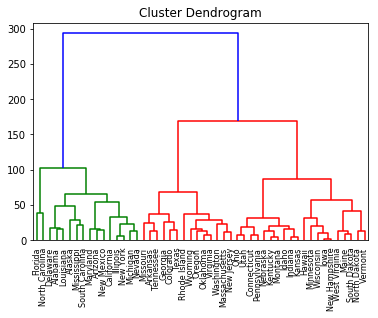

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

data = pd.read_csv('USArrests.csv')

x = data.drop('State', axis=1)
y = data['State']

hc = hierarchy.linkage(x, method = 'complete', metric='euclidean')

plt.figure()
dn = hierarchy.dendrogram(hc, labels=np.array(y))
plt.title('Cluster Dendrogram')
plt.show()

In [7]:
clusters = pd.DataFrame({'State': y, 
                         'Cluster': hierarchy.fcluster(hc, 3, criterion='maxclust')})

clusters

,Cluster,State
0,1,Alabama
1,1,Alaska
2,1,Arizona
3,2,Arkansas
4,1,California
5,2,Colorado
6,3,Connecticut
7,1,Delaware
8,1,Florida
9,2,Georgia


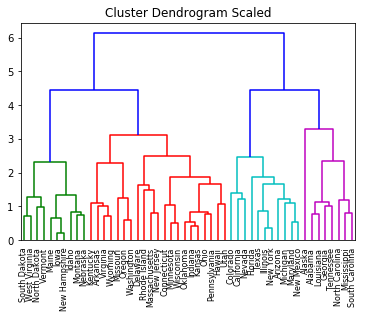

In [8]:
x_scale = scale(x)
hc_scaled = hierarchy.linkage(x_scale, method='complete', metric='euclidean')
plt.figure()
dn = hierarchy.dendrogram(hc_scaled, labels=np.array(y))
plt.title('Cluster Dendrogram Scaled')
plt.show()

In [9]:
clusters_scaled = pd.DataFrame({'State': y,
                                'Cluster': hierarchy.fcluster(hc_scaled, 3, criterion='maxclust')})

clusters_scaled

,Cluster,State
0,3,Alabama
1,3,Alaska
2,2,Arizona
3,1,Arkansas
4,2,California
5,2,Colorado
6,1,Connecticut
7,1,Delaware
8,2,Florida
9,3,Georgia


In [12]:
clusters_all = pd.DataFrame({'X': clusters['Cluster'],
                             'X_scaled': clusters_scaled['Cluster']})

pd.crosstab(clusters_all.X, clusters_all.X_scaled)

X_scaled,1,2,3
X,,,
1,1,9,6
2,10,2,2
3,20,0,0


## Exercise 4

In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.
1. Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.
2. Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (3). If not, the return to part (1) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (3) until the three classes show at least some separation in the first two principal component score vectors.
3. Perform K-means clustering of the observations with `K = 3`. How well do the clusters that you obtained in K-means clustering compare to the true class labels?
4. Perform K-means clustering with `K = 2`. Describe your results.
5. Now perform K-means clustering with `K = 4`, and describe your results.
6. Now perform K-means clustering with `K = 3` on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60x2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.
7. Using the `scale()` function, perform K-means clustering with `K = 3` on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (2)? Explain.

In [13]:
np.random.seed(0)

x1 = np.random.normal(size = (20, 50))
x2 = np.random.normal(loc = 1, size = (20, 50))
x3 = np.random.normal(loc = 2, size = (20, 50))

x = np.vstack((x1, x2, x3))
y = [c for c in (0, 1, 2) for i in range(0, 20)]

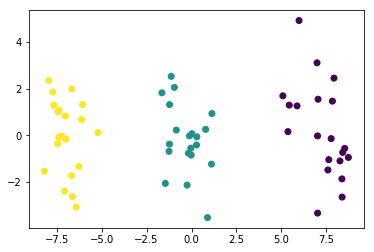

In [14]:
pc = PCA()
pc.fit(x)
x_pc = pc.transform(x)

plt.scatter(x_pc[:, 0], x_pc[:, 1], c=y)
plt.show()

In [15]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init=20)
km.fit(x)

clusters = pd.DataFrame({'Actual': y,
                         'KMeans': km.labels_})

pd.crosstab(clusters.Actual, clusters.KMeans)

KMeans,0,1,2
Actual,,,
0,0,20,0
1,20,0,0
2,0,0,20


In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, n_init=20)
km.fit(x)

clusters = pd.DataFrame({'Actual': y,
                         'KMeans': km.labels_})

pd.crosstab(clusters.Actual, clusters.KMeans)

KMeans,0,1
Actual,,
0,0,20
1,20,0
2,20,0


In [17]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, n_init=20)
km.fit(x)

clusters = pd.DataFrame({'Actual': y,
                         'KMeans': km.labels_})

pd.crosstab(clusters.Actual, clusters.KMeans)

KMeans,0,1,2,3
Actual,,,,
0,0,20,0,0
1,3,0,0,17
2,0,0,20,0


In [18]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init=20)
km.fit(x_pc[:,  :2])

clusters = pd.DataFrame({'Actual': y,
                         'KMeans': km.labels_})

pd.crosstab(clusters.Actual, clusters.KMeans)

KMeans,0,1,2
Actual,,,
0,0,20,0
1,20,0,0
2,0,0,20


In [19]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init=20)
km.fit(scale(x))

clusters = pd.DataFrame({'Actual': y,
                         'KMeans': km.labels_})

pd.crosstab(clusters.Actual, clusters.KMeans)

KMeans,0,1,2
Actual,,,
0,20,0,0
1,0,20,0
2,0,0,20


## Exercise 5

We will use a gene expression data set that consists of 40 tissue samples with measurements on 1000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.
1. Load the data.
2. Apply hierarchical clustering to the samples using correlation-based distance, and plot the dendrogram. Do the genes separate the samples into two groups? Do your results depend on the type of linkage used?
3. Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.

In [20]:
data = pd.read_csv('Genes.csv', header=None).transpose()

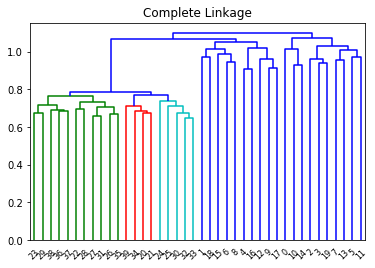

In [22]:
hc = hierarchy.linkage(data, method='complete', metric='correlation')
plt.figure()
dn = hierarchy.dendrogram(hc)
plt.title('Complete Linkage')
plt.show()

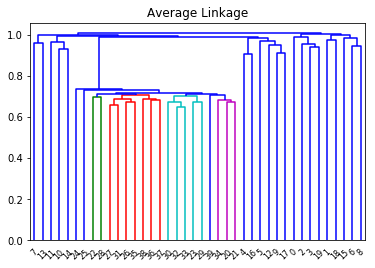

In [23]:
hc = hierarchy.linkage(data, method='average', metric='correlation')
plt.figure()
dn = hierarchy.dendrogram(hc)
plt.title('Average Linkage')
plt.show()

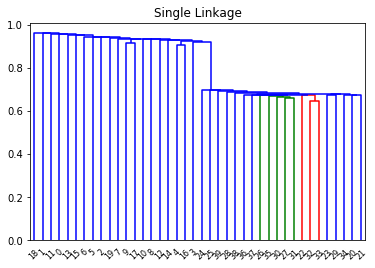

In [24]:
hc = hierarchy.linkage(data, method='single', metric='correlation')
plt.figure()
dn = hierarchy.dendrogram(hc)
plt.title('Single Linkage')
plt.show()

In [26]:
data = pd.read_csv('Genes.csv', header=None).transpose()

pc = PCA()
pc.fit(data)

loadings = np.absolute(pd.DataFrame(pc.components_))
loadings.apply(sum, axis=0).sort_values(ascending=False)

913    1.368435
523    1.365253
581    1.364275
11     1.364143
548    1.343163
745    1.332352
290    1.328606
324    1.322050
586    1.319617
152    1.315373
590    1.314147
528    1.300547
593    1.294029
542    1.282363
394    1.274867
13     1.267161
908    1.264860
571    1.263889
559    1.260270
269    1.256612
12     1.254660
561    1.254402
965    1.252244
319    1.251717
400    1.247782
45     1.246897
241    1.246680
175    1.246493
256    1.246052
566    1.245522
         ...   
626    0.778493
314    0.777602
809    0.775422
604    0.773049
645    0.771878
588    0.771419
147    0.770853
872    0.767765
407    0.760285
902    0.751802
393    0.750877
184    0.748124
828    0.746856
871    0.743491
944    0.740160
201    0.737117
709    0.737036
699    0.735574
473    0.734169
293    0.732359
946    0.730234
202    0.726231
446    0.725099
724    0.724387
418    0.708561
164    0.700452
664    0.699203
927    0.697993
97     0.683002
358    0.573569
dtype: float64